# Varmepumpe

In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
file = "/Users/sebastianredzic/Downloads/Data termisk lab 1 - Sheet1.tsv"

K = 273.15 # K
m_w = 4 # kg
c_w = 4200 # J K^-1 kg^-1
dt = 2*60 # min
errorP = 1 # W
errorM = 0.05 # kg
errorT = 0.05 # K

def efficiency_exp(dT, P, dt, c_w, m_w):
    return (c_w*m_w*dT)/(P*dt)

def efficiency_carnot(T1, T2):
    return T2/np.abs(T2-T1)

[0.07238021 0.07238021 0.07233163 0.07239073 0.07247321 0.07248641
 0.0724241  0.07248641 0.07244795 0.07244795 0.0724604  0.07248641
 0.0724604 ]


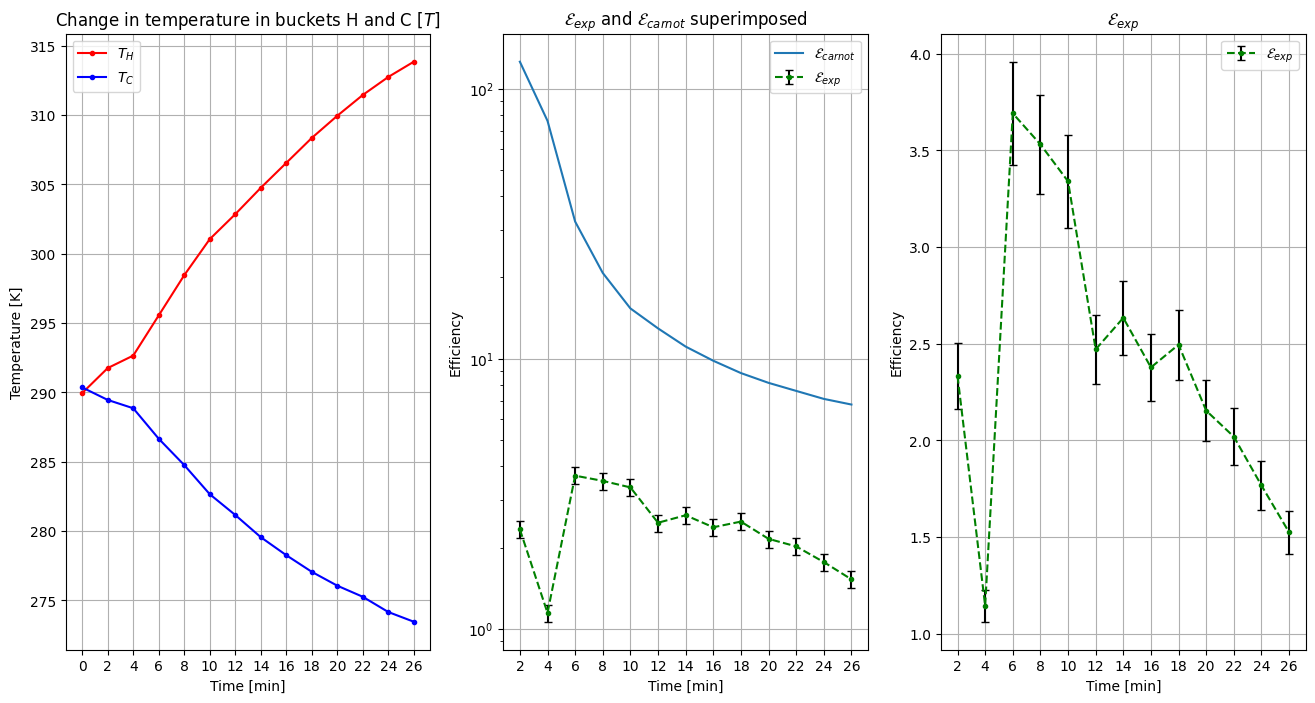

In [195]:
T_H = [] # °C
T_C = [] # °C
P = [] # W
t = [] # min
eff_exp = []


with open(file, "r") as f:
    n = 0
    for lines in f:
        if n == 0:
            n += 1
            pass

        else:
            column = lines.split("\t")
            t.append(float(column[0].replace(",", ".")))
            T_C.append(float(column[1].replace(",", ".")))
            T_H.append(float(column[2].replace(",", ".")))
            P.append(float(column[9].replace(",", ".")))
            
T_H = np.array(T_H) + K
T_C = np.array(T_C) + K
P = np.array(P)

for i in range(len(t) - 1):
    eff_exp.append(efficiency_exp(T_H[i+1]-T_H[i], P[i], dt, c_w, m_w))

eff_carnot = efficiency_carnot(T_H[1:], T_C[1:])
relative_error_T = np.sqrt(errorT**2+errorT**2)
relative_err_P = errorP/P
relative_err_m = errorM/m_w

error = np.sqrt(relative_error_T**2+relative_err_P**2+relative_err_m**2)

error = np.delete(error, 0)
print(error)

plt.figure(figsize =(16, 8))

plt.subplot(1, 3, 1)
plt.plot(t, T_H, marker = ".", label = "$T_H$", color = "r")
plt.plot(t, T_C, marker = ".", label = "$T_C$", color = "b")
plt.xticks(t)
plt.grid()
plt.legend()
plt.xlabel("Time [min]")
plt.ylabel("Temperature [K]")
plt.title("Change in temperature in buckets H and C [$T$]")

t.pop(0)

plt.subplot(1, 3, 2)
plt.plot(t, eff_carnot, label = "$\mathcal{E}_{carnot}$")
plt.errorbar(t, eff_exp, yerr = error*eff_exp, fmt = "g--.", capsize = 3, ecolor='black', label = "$\mathcal{E}_{exp}$")
plt.xticks(t)
plt.yscale("log")
plt.grid()
plt.xlabel("Time [min]")
plt.ylabel("Efficiency")
plt.legend()
plt.title("$\mathcal{E}_{exp}$ and $\mathcal{E}_{carnot}$ superimposed")

plt.subplot(1, 3, 3)
plt.errorbar(t, eff_exp, yerr = error*eff_exp, fmt = "g--.", capsize = 3, ecolor='black', label = "$\mathcal{E}_{exp}$")
plt.xticks(t)
plt.grid()
plt.xlabel("Time [min]")
plt.ylabel("Efficiency")
plt.title("$\mathcal{E}_{exp}$")
plt.legend()

plt.show()